In [16]:

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '29e0da79-40ff-42b9-ab31-833479759503',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
 # print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

In [17]:
type(data)

dict

In [28]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [19]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11041,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.969658e+07,1.969658e+07,False,NaN,1,NaN,NaN,None,2024-05-11T00:05:00.000Z,60845.776024,2.772236e+10,8.9991,-0.114204,-3.340838,-3.252042,-13.632238,-15.811095,27.505693,1.198454e+12,53.2418,1.277761e+12,None,2024-05-11T00:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-11 05:37:28.710045
1,1027,Ethereum,ETH,ethereum,8911,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201073e+08,1.201073e+08,True,NaN,2,NaN,NaN,None,2024-05-11T00:04:00.000Z,2912.727796,1.224744e+10,12.8858,0.154281,-3.880612,-6.093929,-17.651356,-28.463054,16.608845,3.498399e+11,15.5438,3.498399e+11,None,2024-05-11T00:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-11 05:37:28.710045
2,825,Tether USDt,USDT,tether,85108,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.108100e+11,1.130866e+11,True,NaN,3,NaN,NaN,None,2024-05-11T00:04:00.000Z,0.999757,5.017356e+10,8.5800,-0.000930,-0.036992,-0.098333,-0.035566,-0.051609,-0.090483,1.107831e+11,4.9222,1.130591e+11,None,2024-05-11T00:04:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-11 05:37:28.710045
3,1839,BNB,BNB,bnb,2155,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475870e+08,1.475870e+08,False,NaN,4,NaN,NaN,None,2024-05-11T00:04:00.000Z,586.308550,1.519875e+09,-19.6691,0.047741,-1.588259,-0.256092,-3.811307,12.153017,81.570698,8.653150e+10,3.8447,8.653150e+10,None,2024-05-11T00:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-11 05:37:28.710045
4,5426,Solana,SOL,solana,657,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.482533e+08,5.757014e+08,True,NaN,5,NaN,NaN,None,2024-05-11T00:04:00.000Z,146.457169,2.458953e+09,9.2974,0.263844,-3.733459,1.856772,-15.242380,-1.433506,34.485731,6.564991e+10,2.9169,8.431559e+10,None,2024-05-11T00:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-11 05:37:28.710045
5,3408,USDC,USDC,usd-coin,19031,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.310800e+10,3.310800e+10,False,NaN,6,NaN,NaN,None,2024-05-11T00:04:00.000Z,1.000030,5.910089e+09,15.4650,-0.002355,-0.020846,-0.025562,-0.007256,0.008318,-0.019294,3.310900e+10,1.4711,3.310900e+10,None,2024-05-11T00:04:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-11 05:37:28.710045
6,52,XRP,XRP,xrp,1314,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.535918e+10,9.998763e+10,False,NaN,7,NaN,NaN,None,2024-05-11T00:05:00.000Z,0.502709,1.097469e+09,12.3546,0.156334,-3.310017,-5.443077,-18.414602,-29.965380,-4.030454,2.782958e+10,1.2365,5.027095e+10,None,2024-05-11T00:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-11 05:37:28.710045
7,11419,Toncoin,TON,toncoin,316,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3.473801e+09,5.106423e+09,True,NaN,8,3.414167e+09,2.317816e+10,None,2024-05-11T00:04:00.000Z,6.788820,7.691161e+08,69.5916,1.204468,5.838670,19.291143,0.648786,107.703656,226.416255,2.358301e+10,1.0478,3.466659e+10,None,2024-05-11T00:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-11 05:37:28.710045
8,74,Dogecoin,DOGE,dogecoin,964,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exch

In [29]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '29e0da79-40ff-42b9-ab31-833479759503',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
     # print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)


    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df2)
    df = pd.concat([df2,df_append])

    if not os.path.isfile(r'C:\Users\Dell\Documents\Python Scripts\Api.csv'):
        df.to_csv(r'C:\Users\Dell\Documents\Python Scripts\Api.csv', header='column_name')
    else:
        df.to_csv(r'C:\Users\Dell\Documents\Python Scripts\Api.csv',mode='a', header=False)

In [30]:
import os
from time import time
from time import sleep


for i in range(333):
    api_runner()
    print('Api runner completed')
    sleep(60)
exit()


Api runner completed
Api runner completed
Api runner completed


KeyboardInterrupt: 

In [32]:
df32 = pd.read_csv(r'C:\Users\Dell\Documents\Python Scripts\Api.csv')
df32

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11041,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.969658e+07,1.969658e+07,False,NaN,1,NaN,NaN,NaN,2024-05-11T00:51:00.000Z,60752.747100,2.758918e+10,8.6321,-0.240025,-3.232436,-3.870871,-13.648308,-15.844202,27.244545,1.196621e+12,53.2294,1.275808e+12,NaN,2024-05-11T00:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-11 06:23:16.043824
1,1,1027,Ethereum,ETH,ethereum,8911,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.201073e+08,1.201073e+08,True,NaN,2,NaN,NaN,NaN,2024-05-11T00:50:00.000Z,2914.701154,1.219271e+10,11.9879,0.114495,-3.620029,-6.712945,-17.445583,-28.460757,16.540777,3.500769e+11,15.5691,3.500769e+11,NaN,2024-05-11T00:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-11 06:23:16.043824
2,2,825,Tether USDt,USDT,tether,85108,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.108100e+11,1.130866e+11,True,NaN,3,NaN,NaN,NaN,2024-05-11T00:50:00.000Z,0.999805,5.012396e+10,8.3638,-0.007143,-0.041199,-0.089520,-0.037541,-0.062106,-0.055772,1.107885e+11,4.9271,1.130646e+11,NaN,2024-05-11T00:50:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-11 06:23:16.043824
3,3,1839,BNB,BNB,bnb,2155,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.475870e+08,1.475870e+08,False,NaN,4,NaN,NaN,NaN,2024-05-11T00:50:00.000Z,586.228475,1.515869e+09,-19.2407,0.068148,-1.504723,-0.410428,-3.552101,11.661598,81.419595,8.651969e+10,3.8478,8.651969e+10,NaN,2024-05-11T00:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-11 06:23:16.043824
4,4,5426,Solana,SOL,solana,657,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.482533e+08,5.757014e+08,True,NaN,5,NaN,NaN,NaN,2024-05-11T00:50:00.000Z,145.764619,2.458951e+09,8.5256,-0.444175,-3.937281,0.747629,-15.127795,-1.701773,34.122132,6.533947e+10,2.9059,8.391689e+10,NaN,2024-05-11T00:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-11 06:23:16.043824
5,5,3408,USDC,USDC,usd-coin,19033,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.310800e+10,3.310800e+10,False,NaN,6,NaN,NaN,NaN,2024-05-11T00:50:00.000Z,1.000104,5.902623e+09,15.5392,-0.002437,-0.026002,-0.015411,-0.008169,0.008537,0.010818,3.311143e+10,1.4726,3.311143e+10,NaN,2024-05-11T00:50:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-11 06:23:16.043824
6,6,52,XRP,XRP,xrp,1314,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.535918e+10,9.998763e+10,False,NaN,7,NaN,NaN,NaN,2024-05-11T00:51:00.000Z,0.503307,1.076874e+09,10.6894,0.160517,-2.779124,-5.341867,-18.688300,-29.521609,-3.842645,2.786267e+10,1.2391,5.033072e+10,NaN,2024-05-11T00:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-11 06:23:16.043824
7,7,11419,Toncoin,TON,toncoin,316,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,3.473801e+09,5.106423e+09,True,NaN,8,3.414167e+09,2.316242e+10,NaN,2024-05-11T00:50:00.000Z,6.784208,7.737503e+08,71.2779,-0.047948,5.461173,18.444917,0.573067,101.632293,226.047538,2.356699e+10,1.0481,3.464304e+10,NaN,2024-05-11T00:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-11 06:23:16.043824
8,8,74,Dogecoin,DOGE,dogecoin,964,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scr

In [27]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11041,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.969658e+07,1.969658e+07,False,NaN,1,NaN,NaN,None,2024-05-11T00:27:00.000Z,60879.239184,2.758706e+10,8.5147,-0.044427,-3.136320,-3.186058,-13.528250,-15.652749,27.643873,1.199113e+12,53.1634,1.278464e+12,None,2024-05-11T00:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-11 06:00:25.891282
1,1027,Ethereum,ETH,ethereum,8911,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201073e+08,1.201073e+08,True,NaN,2,NaN,NaN,None,2024-05-11T00:27:00.000Z,2918.702528,1.218244e+10,11.9545,0.318229,-3.508618,-6.031945,-17.362916,-28.513363,16.833331,3.505575e+11,15.5427,3.505575e+11,None,2024-05-11T00:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-11 06:00:25.891282
2,825,Tether USDt,USDT,tether,85108,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.108100e+11,1.130866e+11,True,NaN,3,NaN,NaN,None,2024-05-11T00:27:00.000Z,0.999883,5.004945e+10,8.1273,0.000316,-0.010009,-0.077933,-0.016210,-0.055997,-0.059439,1.107970e+11,4.9124,1.130733e+11,None,2024-05-11T00:27:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-11 06:00:25.891282
3,1839,BNB,BNB,bnb,2155,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475870e+08,1.475870e+08,False,NaN,4,NaN,NaN,None,2024-05-11T00:27:00.000Z,587.520197,1.518573e+09,-19.4034,0.235049,-1.221868,-0.074587,-3.650141,11.969306,82.017956,8.671033e+10,3.8445,8.671033e+10,None,2024-05-11T00:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-11 06:00:25.891282
4,5426,Solana,SOL,solana,657,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.482533e+08,5.757014e+08,True,NaN,5,NaN,NaN,None,2024-05-11T00:27:00.000Z,146.630362,2.446547e+09,7.7366,0.109762,-3.427237,1.787269,-15.001341,-1.122659,35.040930,6.572755e+10,2.9142,8.441530e+10,None,2024-05-11T00:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-11 06:00:25.891282
5,3408,USDC,USDC,usd-coin,19033,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.310800e+10,3.310800e+10,False,NaN,6,NaN,NaN,None,2024-05-11T00:27:00.000Z,1.000098,5.890902e+09,14.8969,0.001009,0.001459,-0.018560,0.004179,0.005774,-0.009089,3.311125e+10,1.4681,3.311125e+10,None,2024-05-11T00:27:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-11 06:00:25.891282
6,52,XRP,XRP,xrp,1314,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.535918e+10,9.998763e+10,False,NaN,7,NaN,NaN,None,2024-05-11T00:28:00.000Z,0.504193,1.080128e+09,10.7147,0.331935,-2.761609,-5.119606,-18.665301,-29.456308,-3.469381,2.791170e+10,1.2375,5.041928e+10,None,2024-05-11T00:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-11 06:00:25.891282
7,11419,Toncoin,TON,toncoin,316,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3.473801e+09,5.106423e+09,True,NaN,8,3.414167e+09,2.325765e+10,None,2024-05-11T00:27:00.000Z,6.812101,7.713187e+08,70.5687,1.198242,6.186668,19.516908,0.018274,108.277623,227.605222,2.366388e+10,1.0492,3.478547e+10,None,2024-05-11T00:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-11 06:00:25.891282
8,74,Dogecoin,DOGE,dogecoin,964,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange

In [33]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [34]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11041,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19696578.00000,19696578.00000,False,NaN,1,NaN,NaN,None,2024-05-11T00:53:00.000Z,60774.18964,27584795621.32636,8.57540,-0.20480,-3.18501,-3.77738,-13.65450,-15.76101,27.39463,1197043566606.79785,53.24820,1276257982414.13989,None,2024-05-11T00:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-11 06:25:19.787552
1,1027,Ethereum,ETH,ethereum,8911,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120107309.98633,120107309.98633,True,NaN,2,NaN,NaN,None,2024-05-11T00:52:00.000Z,2916.20955,12193056893.11613,11.91920,0.15213,-3.55538,-6.68607,-17.41838,-28.45953,16.50766,350258084377.70276,15.56960,350258084377.70001,None,2024-05-11T00:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-11 06:25:19.787552
2,825,Tether USDt,USDT,tether,85108,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,110810011395.86620,113086550460.93433,True,NaN,3,NaN,NaN,None,2024-05-11T00:52:00.000Z,0.99968,50122879299.31771,8.34330,-0.02149,-0.02538,-0.11142,-0.02160,-0.05458,-0.08469,110774831758.75824,4.92410,113050648074.89000,None,2024-05-11T00:52:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-11 06:25:19.787552
3,1839,BNB,BNB,bnb,2155,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147586973.13414,147586973.13414,False,NaN,4,NaN,NaN,None,2024-05-11T00:52:00.000Z,586.40159,1515324028.49107,-19.27260,0.09027,-1.46097,-0.40616,-3.48971,11.72289,81.38217,86545236242.55107,3.84710,86545236242.55000,None,2024-05-11T00:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-11 06:25:19.787552
4,5426,Solana,SOL,solana,657,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,448253314.58033,575701365.02132,True,NaN,5,NaN,NaN,None,2024-05-11T00:52:00.000Z,145.94761,2458887297.79143,8.49880,-0.29119,-3.74387,0.71407,-14.97503,-1.46905,34.16539,65421502047.12606,2.90810,84022241007.94000,None,2024-05-11T00:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-11 06:25:19.787552
5,3408,USDC,USDC,usd-coin,19033,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33107997131.29800,33107997131.29800,False,NaN,6,NaN,NaN,None,2024-05-11T00:52:00.000Z,0.99999,5902856779.37995,15.47930,-0.01500,-0.00509,-0.04139,-0.00180,0.01166,-0.01572,33107725805.00906,1.47170,33107725805.01000,None,2024-05-11T00:52:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-11 06:25:19.787552
6,52,XRP,XRP,xrp,1314,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55359176420.00000,99987633657.00000,False,NaN,7,NaN,NaN,None,2024-05-11T00:53:00.000Z,0.50367,1076785462.25961,10.69340,0.21664,-2.69048,-5.23494,-18.64308,-29.37432,-3.79345,27882647834.29179,1.23940,50366803911.16000,None,2024-05-11T00:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-11 06:25:19.787552
7,11419,Toncoin,TON,toncoin,316,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3473800548.61415,5106423301.37507,True,NaN,8,3414166606.00000,23152219197.99616,None,2024-05-11T00:52:00.000Z,6.78122,773782620.70600,71.21060,0.04003,5.71312,18.17926,0.75816,101.18321,225.80485,23556610157.89166,1.04710,34627786290.05000,Non

In [35]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.20480,-3.18501,-3.77738,-13.65450,-15.76101,27.39463
Ethereum,0.15213,-3.55538,-6.68607,-17.41838,-28.45953,16.50766
Tether USDt,-0.02149,-0.02538,-0.11142,-0.02160,-0.05458,-0.08469
BNB,0.09027,-1.46097,-0.40616,-3.48971,11.72289,81.38217
Solana,-0.29119,-3.74387,0.71407,-14.97503,-1.46905,34.16539
USDC,-0.01500,-0.00509,-0.04139,-0.00180,0.01166,-0.01572
XRP,0.21664,-2.69048,-5.23494,-18.64308,-29.37432,-3.79345
Toncoin,0.04003,5.71312,18.17926,0.75816,101.18321,225.80485
Dogecoin,0.01432,-4.44929,-4.77259,-27.26574,-19.43023,76.91549


In [36]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.20480
              quote.USD.percent_change_24h    -3.18501
              quote.USD.percent_change_7d     -3.77738
              quote.USD.percent_change_30d   -13.65450
              quote.USD.percent_change_60d   -15.76101
              quote.USD.percent_change_90d    27.39463
Ethereum      quote.USD.percent_change_1h      0.15213
              quote.USD.percent_change_24h    -3.55538
              quote.USD.percent_change_7d     -6.68607
              quote.USD.percent_change_30d   -17.41838
              quote.USD.percent_change_60d   -28.45953
              quote.USD.percent_change_90d    16.50766
Tether USDt   quote.USD.percent_change_1h     -0.02149
              quote.USD.percent_change_24h    -0.02538
              quote.USD.percent_change_7d     -0.11142
              quote.USD.percent_change_30d    -0.02160
              quote.USD.percent_change_60d    -0.05458
              quote.US

In [37]:
type(df4)

pandas.core.series.Series

In [39]:
df5 = df4.to_frame(name='Values')
df5

Values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.20480
             quote.USD.percent_change_24h  -3.18501
             quote.USD.percent_change_7d   -3.77738
             quote.USD.percent_change_30d -13.65450
             quote.USD.percent_change_60d -15.76101
             quote.USD.percent_change_90d  27.39463
Ethereum     quote.USD.percent_change_1h    0.15213
             quote.USD.percent_change_24h  -3.55538
             quote.USD.percent_change_7d   -6.68607
             quote.USD.percent_change_30d -17.41838
             quote.USD.percent_change_60d -28.45953
             quote.USD.percent_change_90d  16.50766
Tether USDt  quote.USD.percent_change_1h   -0.02149
             quote.USD.percent_change_24h  -0.02538
             quote.USD.percent_change_7d   -0.11142
             quote.USD.percent_change_30d  -0.02160
             quote.USD.percent_change_60d  -0.05458
             quote.USD.percent_change_90d  -0.08469
BNB          quote.USD.percent_change_1h    0.09027
             quote.USD.percent_change_24h  -1.46097
             quote.USD.percent_change_7d   -0.40616
             quote.USD.percent_change_30d  -3.48971
             quote.USD.percent_change_60d  11.72289
             quote.USD.percent_change_90d  81.38217
Solana       quote.USD.percent_change_1h   -0.29119
             quote.USD.percent_change_24h  -3.74387
             quote.USD.percent_change_7d    0.71407
             quote.USD.percent_change_30d -14.97503
             quote.USD.percent_change_60d  -1.46905
             quote.USD.percent_change_90d  34.16539
USDC         quote.USD.percent_change_1h   -0.01500
             quote.USD.percent_change_24h  -0.00509
             quote.USD.percent_change_7d   -0.04139
             quote.USD.percent_change_30d  -0.00180
             quote.USD.percent_change_60d   0.01166
             quote.USD.percent_change_90d  -0.01572
XRP          quote.USD.percent_change_1h    0.21664
             quote.USD.percent_change_24h  -2.69048
             quote.USD.percent_change_7d   -5.23494
             quote.USD.percent_change_30d -18.64308
             quote.USD.percent_change_60d -29.37432
             quote.USD.percent_change_90d  -3.79345
Toncoin      quote.USD.percent_change_1h    0.04003
             quote.USD.percent_change_24h   5.71312
             quote.USD.percent_change_7d   18.17926
             quote.USD.percent_change_30d   0.75816
             quote.USD.percent_change_60d 101.18321
             quote.USD.percent_change_90d 225.80485
Dogecoin     quote.USD.percent_change_1h    0.01432
             quote.USD.percent_change_24h  -4.44929
             quote.USD.percent_change_7d   -4.77259
             quote.USD.percent_change_30d -27.26574
             quote.USD.percent_change_60d -19.43023
             quote.USD.percent_change_90d  76.91549
Cardano      quote.USD.percent_change_1h   -0.23165
             quote.USD.percent_change_24h  -2.97824
             quote.USD.percent_change_7d   -4.79804
             quote.USD.percent_change_30d -23.77667
             quote.USD.percent_change_60d -41.72551
             quote.USD.percent_change_90d -19.68975
Shiba Inu    quote.USD.percent_change_1h   -0.00577
             quote.USD.percent_change_24h  -3.59109
             quote.USD.percent_change_7d  -10.05977
             quote.USD.percent_change_30d -19.23589
             quote.USD.percent_change_60d -33.82895
             quote.USD.percent_change_90d 138.50096
Avalanche    quote.USD.percent_change_1h   -0.01145
             quote.USD.percent_change_24h  -3.44373
             quote.USD.percent_change_7d   -5.67433
             quote.USD.percent_change_30d -28.10137
             quote.USD.percent_change_60d -30.74619
             quote.USD.percent_change_90d -16.47753
TRON         quote.USD.percent_change_1h    0.17828
             quote.USD.percent_change_24h   1.22449
             quote.USD.percent_change_7d    4.00142
             quote.USD.percent_change_30d

In [41]:
df5.count()

Values    90
dtype: int64

In [43]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,Values
0,Bitcoin,quote.USD.percent_change_1h,-0.20480
1,Bitcoin,quote.USD.percent_change_24h,-3.18501
2,Bitcoin,quote.USD.percent_change_7d,-3.77738
3,Bitcoin,quote.USD.percent_change_30d,-13.65450
4,Bitcoin,quote.USD.percent_change_60d,-15.76101
5,Bitcoin,quote.USD.percent_change_90d,27.39463
6,Ethereum,quote.USD.percent_change_1h,0.15213
7,Ethereum,quote.USD.percent_change_24h,-3.55538
8,Ethereum,quote.USD.percent_change_7d,-6.68607
9,Ethereum,quote.USD.percent_change_30d,-17.41838


In [50]:
df7 = df6.rename(columns={'level_1': 'percentage'})
df7

,name,percentage,Values
0,Bitcoin,quote.USD.percent_change_1h,-0.20480
1,Bitcoin,quote.USD.percent_change_24h,-3.18501
2,Bitcoin,quote.USD.percent_change_7d,-3.77738
3,Bitcoin,quote.USD.percent_change_30d,-13.65450
4,Bitcoin,quote.USD.percent_change_60d,-15.76101
5,Bitcoin,quote.USD.percent_change_90d,27.39463
6,Ethereum,quote.USD.percent_change_1h,0.15213
7,Ethereum,quote.USD.percent_change_24h,-3.55538
8,Ethereum,quote.USD.percent_change_7d,-6.68607
9,Ethereum,quote.USD.percent_change_30d,-17.41838


In [53]:
df7['percentage'] = df7['percentage'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percentage,Values
0,Bitcoin,1h,-0.20480
1,Bitcoin,24h,-3.18501
2,Bitcoin,7d,-3.77738
3,Bitcoin,30d,-13.65450
4,Bitcoin,60d,-15.76101
5,Bitcoin,90d,27.39463
6,Ethereum,1h,0.15213
7,Ethereum,24h,-3.55538
8,Ethereum,7d,-6.68607
9,Ethereum,30d,-17.41838


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

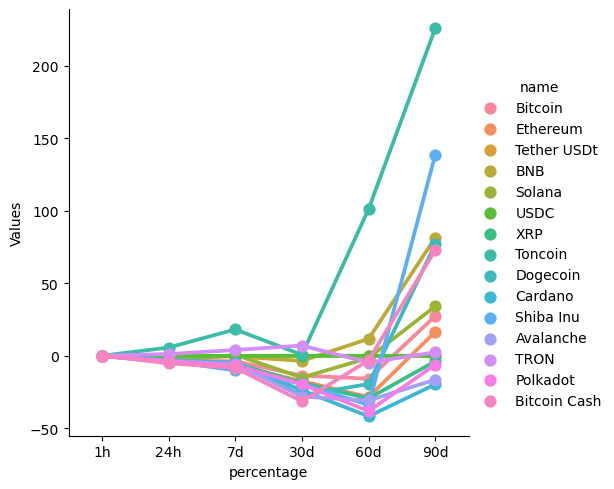

In [54]:
sns.catplot(x='percentage', y='Values', hue='name', data=df7, kind='point')

In [56]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,60774.18964,2024-05-11 06:25:19.787552
0,Bitcoin,60774.18964,2024-05-11 06:25:19.787552


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

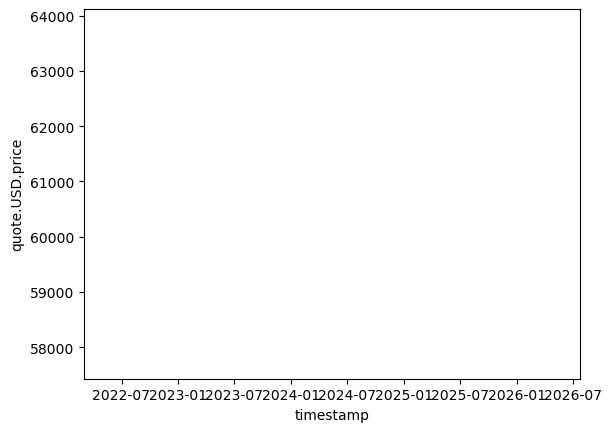

In [60]:
import warnings
import pandas as pd
import seaborn as sns

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Plotting using seaborn
sns.lineplot(x='timestamp', y='quote.USD.price', data=df10)

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

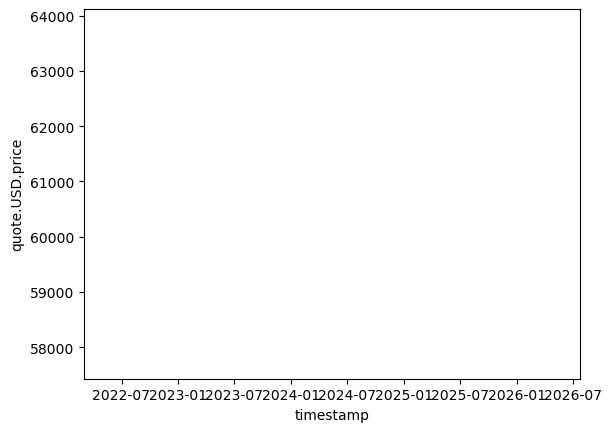

In [58]:
import numpy as np

df10.replace([np.inf, -np.inf], np.nan, inplace=True)
sns.lineplot(x='timestamp', y='quote.USD.price', data=df10)





<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

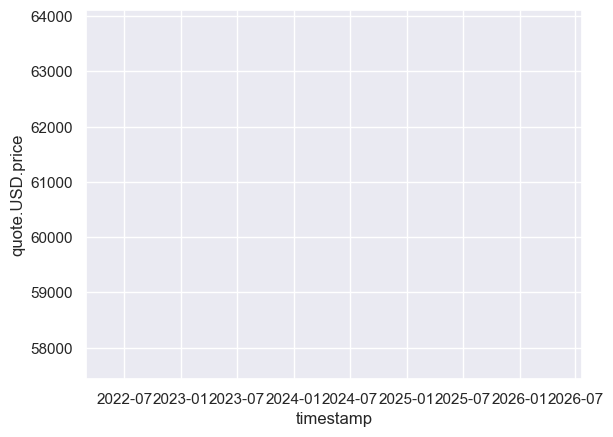

In [61]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data=df10)